# Problem Statement:
The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

# Attribute Information

Input variables (based on physicochemical tests):
1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol
Output variable (based on sensory data):
12 - quality (score between 0 and 10)

In [1]:
#Importing the relevant libraries

import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
scaler = StandardScaler() 
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn import metrics
from sklearn.metrics import mean_squared_error, plot_confusion_matrix, confusion_matrix, roc_curve, roc_auc_score, classification_report
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, RandomForestClassifier


import warnings
warnings.filterwarnings("ignore")

In [2]:
#reading the train datset
df_ = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv" )
df=df_
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
#Checking if have some null values for Clean the data
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


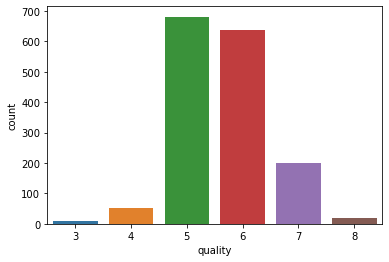

In [5]:
#checking for imbalance
sns.countplot(x="quality",data=df)

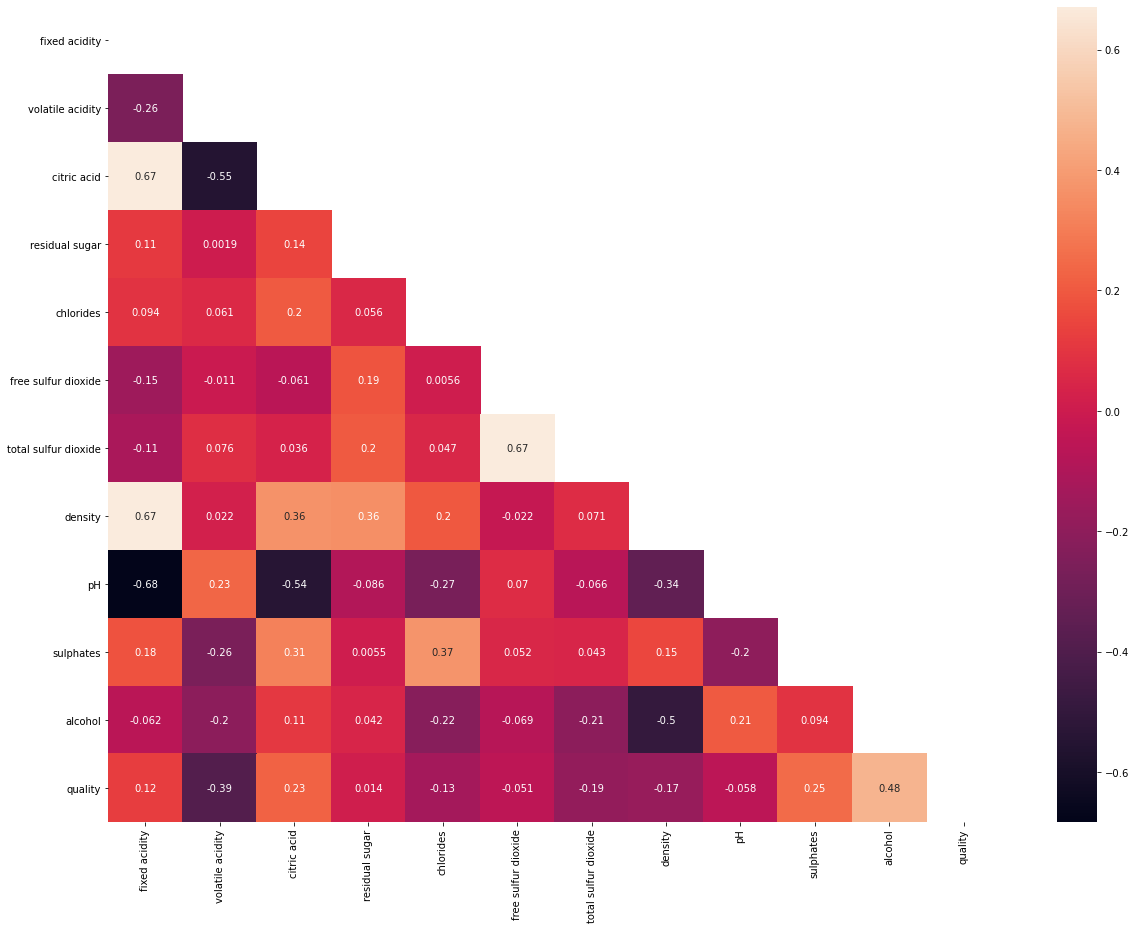

In [6]:
#correlation matrix
plt.figure(figsize=(20,15))
#ax=subplot(111)
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True, mask=matrix)

In [7]:
#Split the data to y and x with x is without the class's.
Y = df[['quality']]
X = df.drop('quality', axis=1)

In [8]:
#split data and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state = 42,stratify=Y)

In [9]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [10]:
#Boruta Method to find out most important features
from boruta import BorutaPy

forest = RandomForestClassifier(n_jobs=-1, max_depth=5, random_state=1)
 
forest.fit(X_train, Y_train)

# Apply The Full Featured Classifier To The Test Data
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, f1_score

Y_pred = forest.predict(X_test)
ac = accuracy_score(Y_test, Y_pred)
fscore = f1_score(Y_test ,Y_pred,average='micro')

# View The Accuracy Of Our Full Feature (8 Features) Model
print("Baseline Model Accuracy:", ac)
print("Baseline Model F1 Score:", fscore)

Baseline Model Accuracy: 0.61
Baseline Model F1 Score: 0.61


In [11]:
# define Boruta feature selection method
# boruta_selector = BorutaPy(forest, n_estimators='auto', verbose=2)
boruta_selector = BorutaPy(forest, n_estimators='auto',verbose=2, random_state=1)

# find all relevant features
boruta_selector.fit(np.array(X_train), np.array(Y_train))



Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	0
Iteration: 	9 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	0
Iteration: 	10 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	0
Iteration: 	11 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	0
Iteration: 	12 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	0
Iteration: 	13 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	0
Iteration: 	14 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	0
Iteration: 	15 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	0
Iteration: 	16 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	0
I

BorutaPy(estimator=RandomForestClassifier(max_depth=5, n_estimators=93,
                                          n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x1173EE79D40),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x1173EE79D40, verbose=2)

In [12]:
# Let's visualise it better in the form of a table
selected_rfe_features = pd.DataFrame({'Feature':list(X.columns),
                                      'Ranking':boruta_selector.ranking_})
selected_rfe_features.sort_values(by='Ranking')

,Feature,Ranking
0,fixed acidity,1
1,volatile acidity,1
2,citric acid,1
3,residual sugar,1
4,chlorides,1
5,free sulfur dioxide,1
6,total sulfur dioxide,1
7,density,1
8,pH,1
9,sulphates,1


In [13]:
X_important_train = boruta_selector.transform(np.array(X_train))
X_important_test = boruta_selector.transform(np.array(X_test))

In [14]:
models=[]
models.append(('LR',LogisticRegression()))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('RFC',RandomForestClassifier()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('GBC',GradientBoostingClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC()))

#evaluate each model in turn
results=[]
names=[]
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=42, shuffle=True)
    cv_results=model_selection.cross_val_score(model, X_important_train, Y_train, cv=kfold, scoring='f1_weighted')
    results.append(cv_results)
    names.append(name)
    msg="%s: %f (%f)" %  (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.572288 (0.034684)
LDA: 0.574068 (0.035712)
RFC: 0.663317 (0.026093)
KNN: 0.553511 (0.030464)
CART: 0.606848 (0.063222)
GBC: 0.641698 (0.046490)
NB: 0.534854 (0.029617)
SVM: 0.588198 (0.048531)


In [15]:
from sklearn.model_selection import GridSearchCV
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gs = GridSearchCV(forest, hyperF, cv = 5, verbose = 1, 
                      n_jobs = -1)
bestF = gs.fit(X_important_train, Y_train)

gs.best_params_

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   29.8s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 2426 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed:  8.0min finished


{'max_depth': 25,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 500}

In [16]:
Y_pred=gs.predict(X_important_test)

In [17]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
def multiclass_roc_auc_score(Y_test, Y_pred, average="macro"):
    lb.fit(Y_test)
    y_test = lb.transform(Y_test)
    y_pred = lb.transform(Y_pred)
    return roc_auc_score(y_test, y_pred, average=average)
multiclass_roc_auc_score(Y_test, Y_pred, average="macro")

0.6335751472438177

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        13
           5       0.72      0.75      0.74       170
           6       0.62      0.73      0.67       160
           7       0.72      0.46      0.56        50
           8       0.50      0.20      0.29         5

    accuracy                           0.67       400
   macro avg       0.43      0.36      0.38       400
weighted avg       0.65      0.67      0.66       400



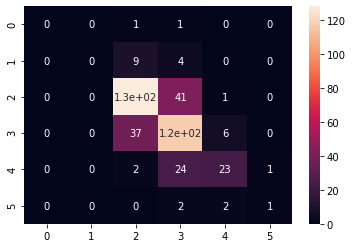

In [18]:
print(classification_report(Y_test,Y_pred))
cnf_imp=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cnf_imp,annot=True)

In [19]:
!pip install yellowbrick

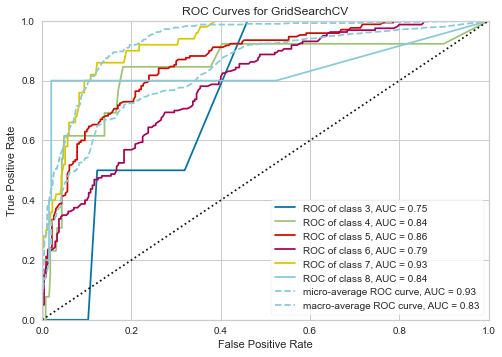

In [20]:
from yellowbrick.classifier import ROCAUC
visualizer = ROCAUC(gs, classes=[0,1,2,3,4,5,6,7,8])
visualizer.fit(X_important_train, Y_train)        # Fit the training data to the visualizer
visualizer.score(X_important_test, Y_test)        # Evaluate the model on the test data
visualizer.show()        